In [2]:


# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
)

# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load the data
filename = list(uploaded.keys())[0]  # assumes one file uploaded
df = pd.read_csv(filename)

# Show the first few rows
df.head()


Saving online_learning.csv to online_learning (1).csv


,videos_watched,assignments_submitted,forum_posts,completed
0,11,6,5,yes
1,43,1,11,no
2,37,1,8,no
3,18,4,14,yes
4,6,4,15,yes


In [3]:
# Replace missing values if any
df = df.fillna(0)

# Example: assume 'completed' is the target
target_col = 'completed'
features = df.drop(columns=[target_col])
labels = df[target_col]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)


In [4]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy: 0.35
Precision: 0.50
Recall: 0.31

Classification Report:
               precision    recall  f1-score   support

          no       0.25      0.43      0.32         7
         yes       0.50      0.31      0.38        13

    accuracy                           0.35        20
   macro avg       0.38      0.37      0.35        20
weighted avg       0.41      0.35      0.36        20



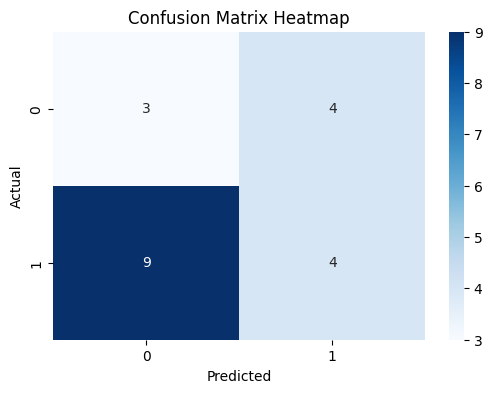

In [7]:
# Accuracy, Precision, Recall
# Accuracy, Precision, Recall
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='yes')
rec = recall_score(y_test, y_pred, pos_label='yes')

print("Accuracy: {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall: {:.2f}".format(rec))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
